In [81]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axisartist.axislines import Subplot
x = np.random.rand(10, 1)
y = 2 * x + np.random.randn(10, 1)

def h(theta1,theta2,x,y):
  m=len(x)
  prev = theta1 + theta2 * x
  final= np.sum((prev - y)** 2) / (2*m) 
  return final

funcarray=[]
t0array=[]
t1array=[]

  


A convex function is a function such that for any 2 numbers (x and y) in a set and a λ between 0 & 1, if the formula λx + (1-λ)y is applied, (aka the linear combination of x and y) a number will be generated which will lie in the same set as x and y. This would also be the weighted average of x and y. 

If the set containing x and y was graphed, it would be a convex set if the line joining x and y would be STRICTLY above the curve of the function.

Formally, a function f(x) is convex on an interval [x,y] if for any two points x_1 and x_2 in [a,b] and any lambda where 0<λ<1,

 f[λx_1+(1-λ)x_2 <= λf(x_1)+(1-λ)f(x_2) 

For example, the function f(x)=x3+ax+b is convex on the intervals of (-∞,0) (confirmed via second derivative test)




Iteration : {1} Final func : {2.0836852544115874} t0 : {1.0159739444354252} t1 : {4.320709982717576}


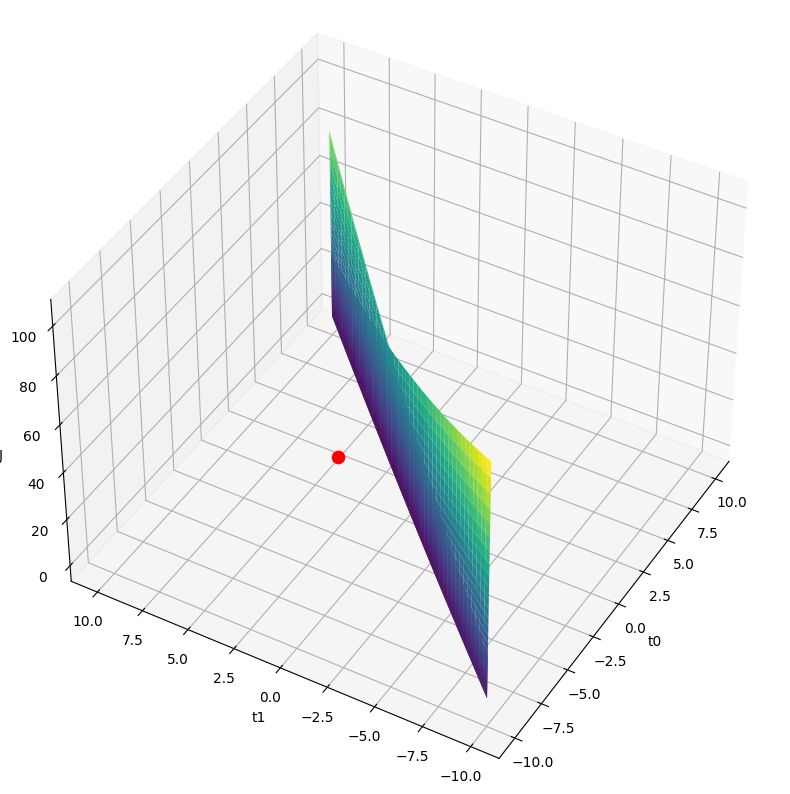

Iteration : {2} Final func : {0.837887358820146} t0 : {0.13605382923605458} t1 : {4.022318766123199}


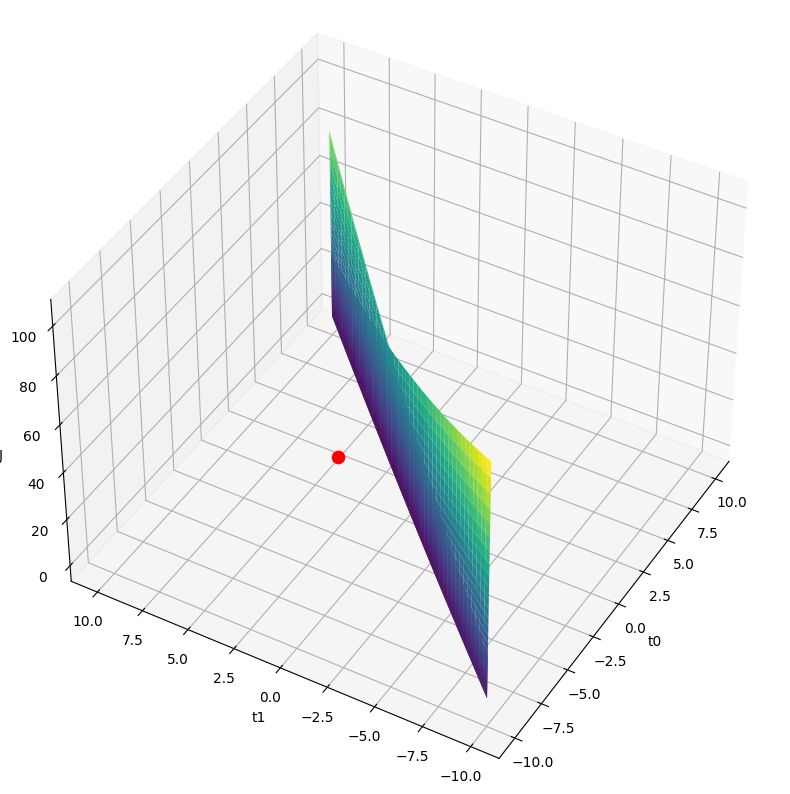

Iteration : {3} Final func : {0.593302847105966} t0 : {-0.25466725869492546} t1 : {3.892630553256503}


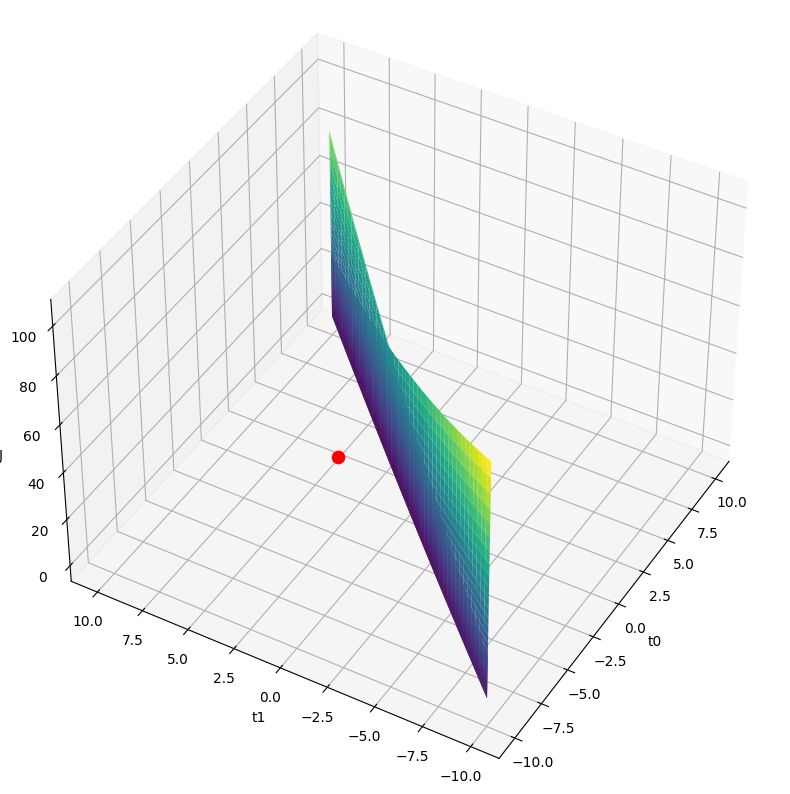

Iteration : {4} Final func : {0.5452558627156254} t0 : {-0.4286273269607156} t1 : {3.837632158902589}


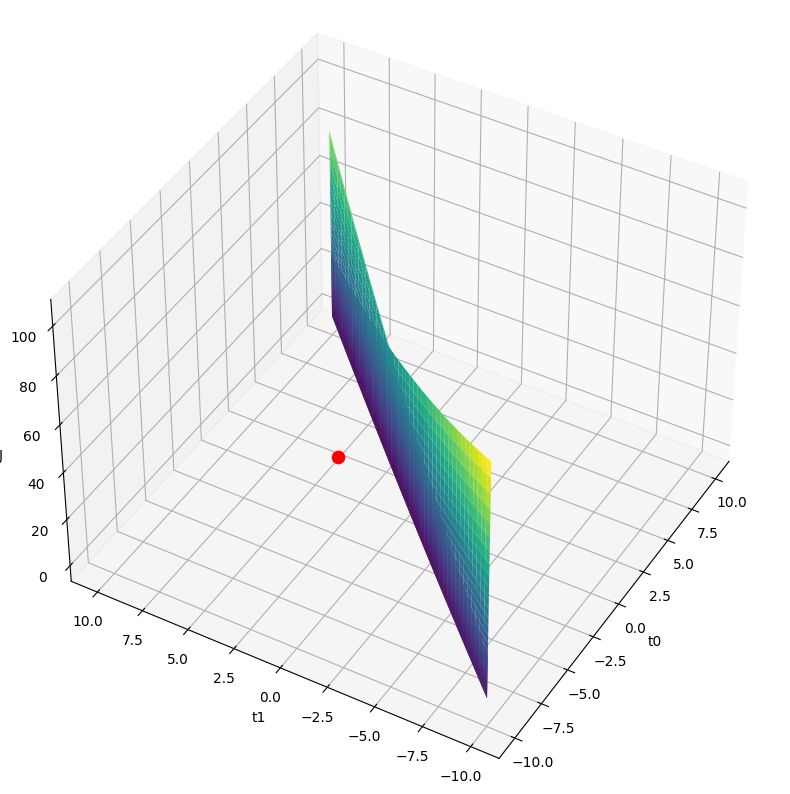

Iteration : {5} Final func : {0.5357902867904292} t0 : {-0.5065318115438358} t1 : {3.8156717686822734}


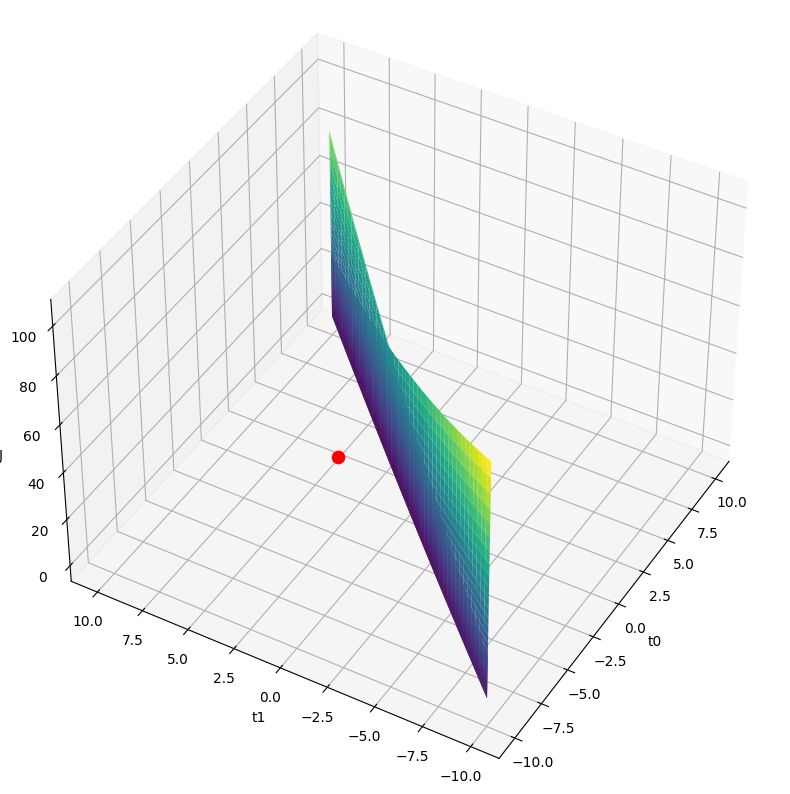

Iteration : {6} Final func : {0.5338996243462981} t0 : {-0.5418602642335694} t1 : {3.8082965094601744}


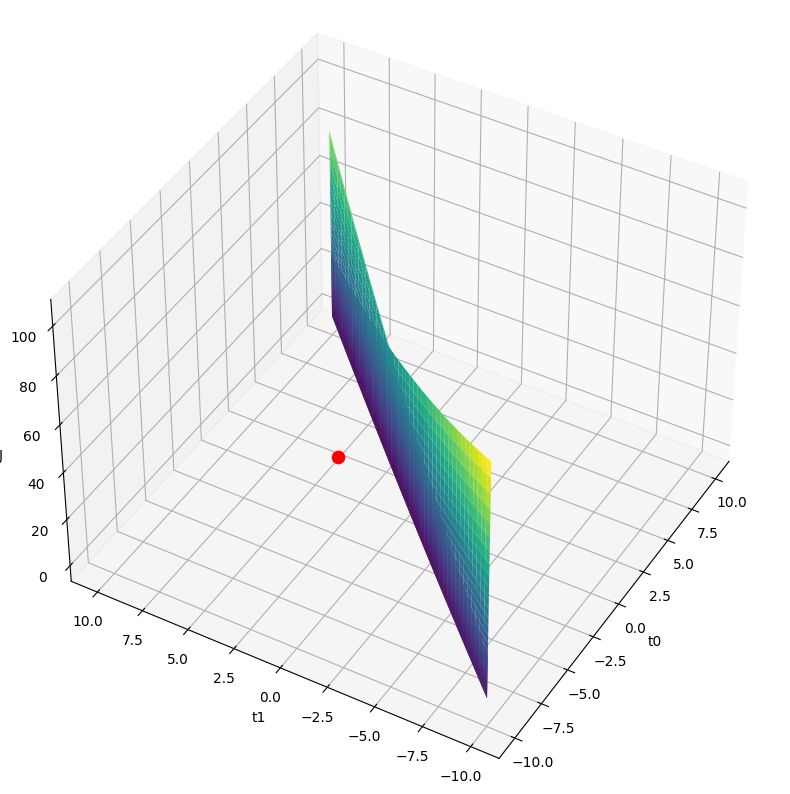

Iteration : {7} Final func : {0.5334973071222855} t0 : {-0.558307463585214} t1 : {3.807331889546517}


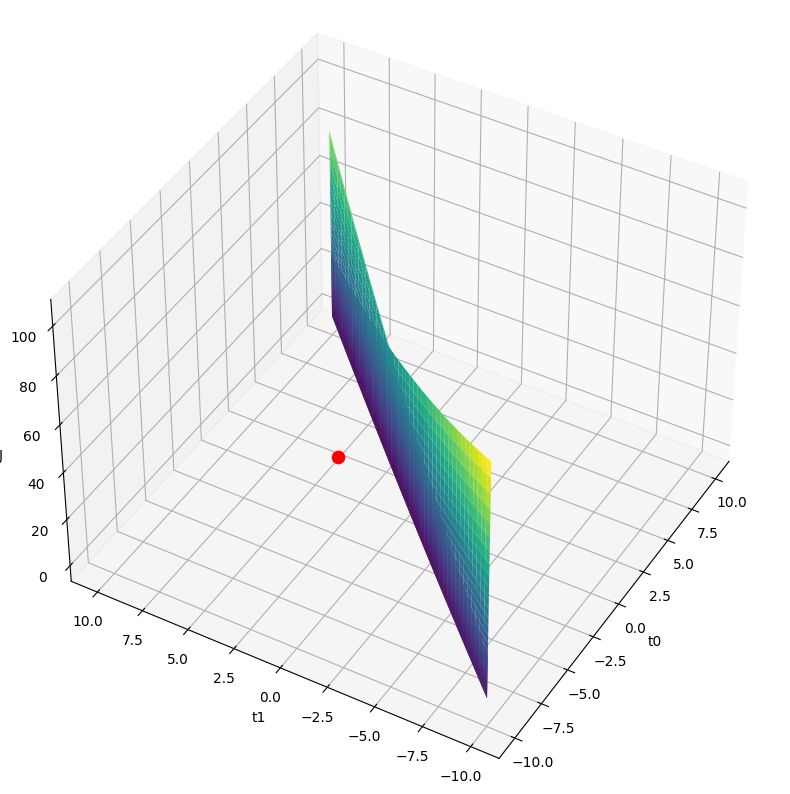

Iteration : {8} Final func : {0.5333884948152109} t0 : {-0.5663718866900483} t1 : {3.809157280577958}


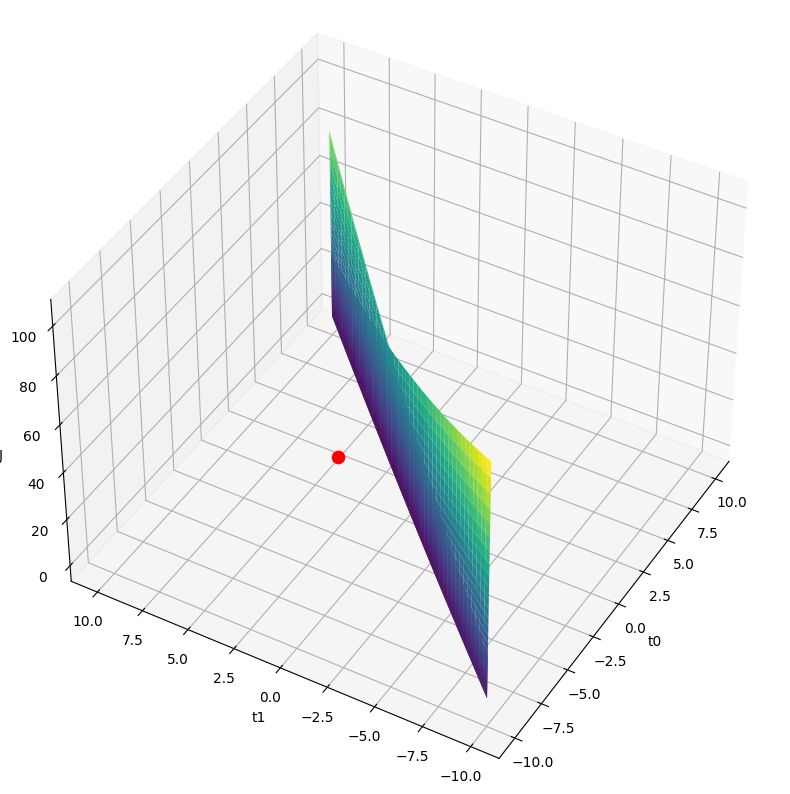

Iteration : {9} Final func : {0.5333385848706845} t0 : {-0.5707053147952063} t1 : {3.8121696416633535}


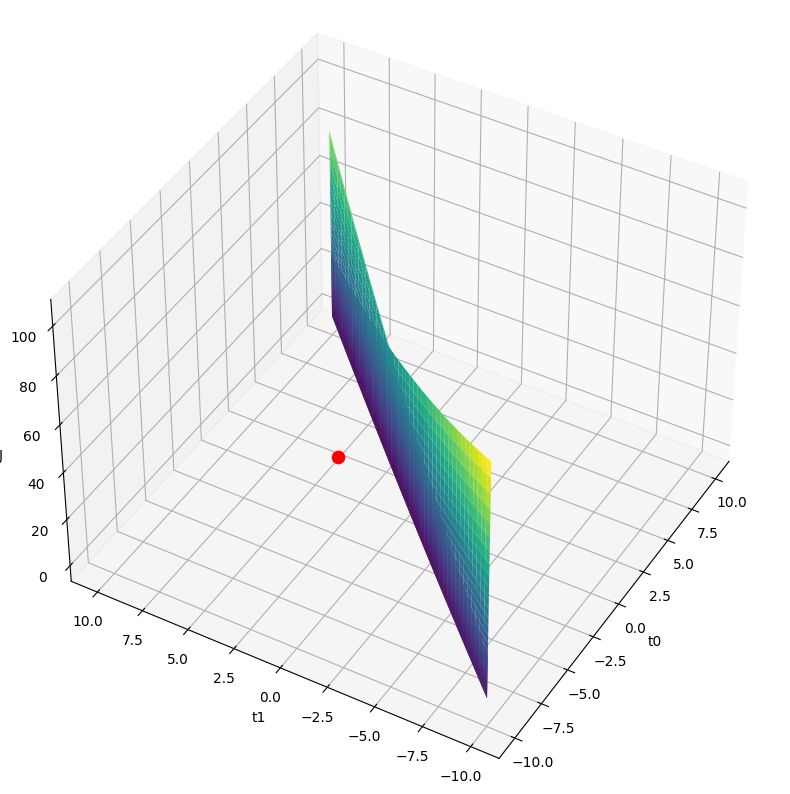

Iteration : {10} Final func : {0.5333014697395011} t0 : {-0.573369113037487} t1 : {3.815659810208051}


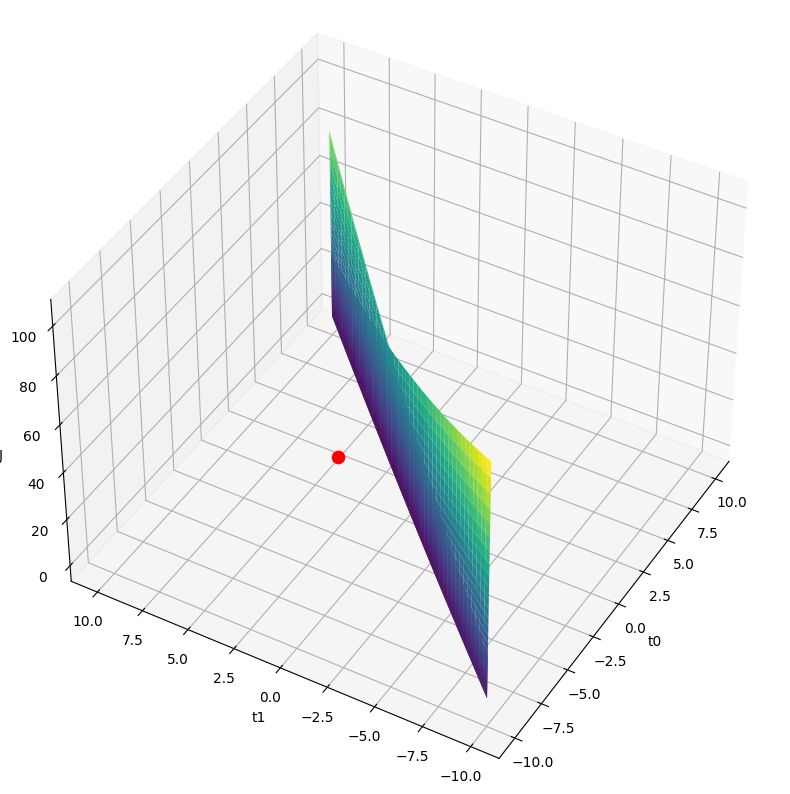

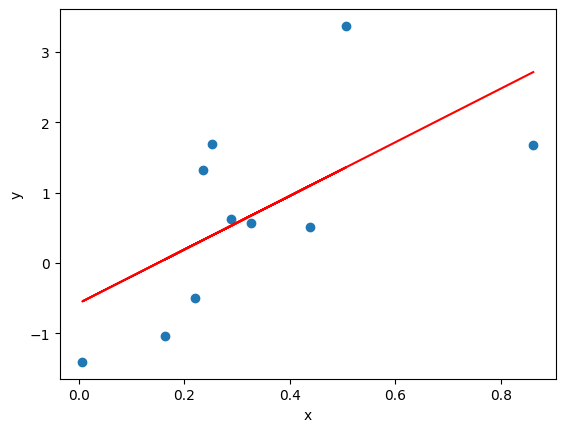

       Cost    Theta0    Theta1
0  2.083685  1.015974  4.320710
1  0.837887  0.136054  4.022319
2  0.593303 -0.254667  3.892631
3  0.545256 -0.428627  3.837632
4  0.535790 -0.506532  3.815672
5  0.533900 -0.541860  3.808297
6  0.533497 -0.558307  3.807332
7  0.533388 -0.566372  3.809157
8  0.533339 -0.570705  3.812170
9  0.533301 -0.573369  3.815660


In [82]:
result = np.linspace(-10,10,170)
r= np.linspace(-10,10,170)
m2 = np.zeros((len(result),len(r)))
def gradient_descent(theta1,theta2,learning_rate,iterations):
  m=len(x)
  previous=theta1+theta2 * x

  for i in range(iterations):
    error = previous - y
    theta1 -= learning_rate * np.sum(error)/m
    theta2 -= learning_rate * np.sum(error * x)/m

    final = h(theta1,theta2,x,y)
    funcarray.append(final)
    t0array.append(theta1)
    t1array.append(theta2)

    print ('Iteration :', {i +1}, 'Final func :',{final},'t0 :',{theta1},'t1 :',{theta2})

    for i, T1 in enumerate(result):
       for j, T2 in enumerate(r):
        m2[i, j] = h(T1, T2, x, y)

    fig = plt.figure(figsize = (10,10))
    ax=fig.add_subplot(111,projection='3d')
    ax.plot_surface(result,r,m2,cmap ='viridis')

    ax.set_xlabel('t0')
    ax.set_ylabel('t1')
    ax.set_zlabel('J')
    ax.scatter(t0array[0],t1array[0],funcarray[0],c ='Red',marker = '.', s =310)
    ax.view_init(41,210)
    plt.show()
    previous = theta1 + theta2 * x
  return theta1, theta2, funcarray

#supposing values of t0 and t1 as 3 and 5, rate will be adjusted for best results
theta1 = 3
theta2 = 5
rate = 0.5
iter = 10

theta1,theta2,funcarray = gradient_descent(theta1,theta2,rate,iter)


Res = pd.DataFrame({'Cost' : funcarray, "Theta0" : t0array, "Theta1" : t1array})
back = theta1 + theta2 * x
plt.scatter(x, y)
plt.plot(x, back, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
print(Res)


